In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import kagglehub


print("Downloading dataset from KaggleHub...")
try:
    path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
    print("Path to dataset files:", path)

    csv_path = f"{path}/IMDB Dataset.csv"
    df = pd.read_csv(csv_path)
except Exception as e:
    print(f"Error downloading or loading dataset from KaggleHub: {e}")
    try:

        df = pd.read_csv('sentiment.csv')
        print("Loaded dataset from local 'sentiment.csv'")
    except FileNotFoundError:
        raise FileNotFoundError("Dataset not found.")



print(df.head())
print(df.info())
print(df['sentiment'].value_counts())

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [2]:

vocab_size = 10000
embedding_dim = 16
max_length = 120

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating='post', padding='post')

labels = np.array([1 if sentiment == 'positive' else 0 for sentiment in df['sentiment']])

print("Padded sequences shape:", padded_sequences.shape)
print("Labels shape:", labels.shape)

Padded sequences shape: (50000, 120)
Labels shape: (50000,)


In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (30000, 120) (30000,)
Validation set shape: (10000, 120) (10000,)
Test set shape: (10000, 120) (10000,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense

def create_model(model_type):

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

    if model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=False))
    elif model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(64, return_sequences=False)))
    else:
        raise ValueError("Invalid model_type specified. Choose from 'LSTM', 'GRU', or 'BiLSTM'.")

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


lstm_model = create_model('LSTM')
gru_model = create_model('GRU')
bilstm_model = create_model('BiLSTM')

print("LSTM model created and compiled:")
lstm_model.summary()

print("\nGRU model created and compiled:")
gru_model.summary()

print("\nBidirectional LSTM model created and compiled:")
bilstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


LSTM model created and compiled:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


GRU model created and compiled:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Bidirectional LSTM model created and compiled:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
epochs = 5
batch_size = 32


print("Training LSTM model...")
lstm_history = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
print("LSTM model training complete.")


print("Training GRU model...")
gru_history = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
print("GRU model training complete.")


print("Training Bidirectional LSTM model...")
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
print("Bidirectional LSTM model training complete.")

Training LSTM model...
LSTM model training complete.
Training GRU model...
GRU model training complete.
Training Bidirectional LSTM model...
Bidirectional LSTM model training complete.


In [6]:

print("Evaluating LSTM model...")
lstm_results = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Model - Loss: {lstm_results[0]:.4f}, Accuracy: {lstm_results[1]:.4f}")


print("Evaluating GRU model...")
gru_results = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Model - Loss: {gru_results[0]:.4f}, Accuracy: {gru_results[1]:.4f}")

print("Evaluating Bidirectional LSTM model...")
bilstm_results = bilstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Bidirectional LSTM Model - Loss: {bilstm_results[0]:.4f}, Accuracy: {bilstm_results[1]:.4f}")

Evaluating LSTM model...
LSTM Model - Loss: 0.4230, Accuracy: 0.8095
Evaluating GRU model...
GRU Model - Loss: 0.4161, Accuracy: 0.8441
Evaluating Bidirectional LSTM model...
Bidirectional LSTM Model - Loss: 0.5204, Accuracy: 0.8314


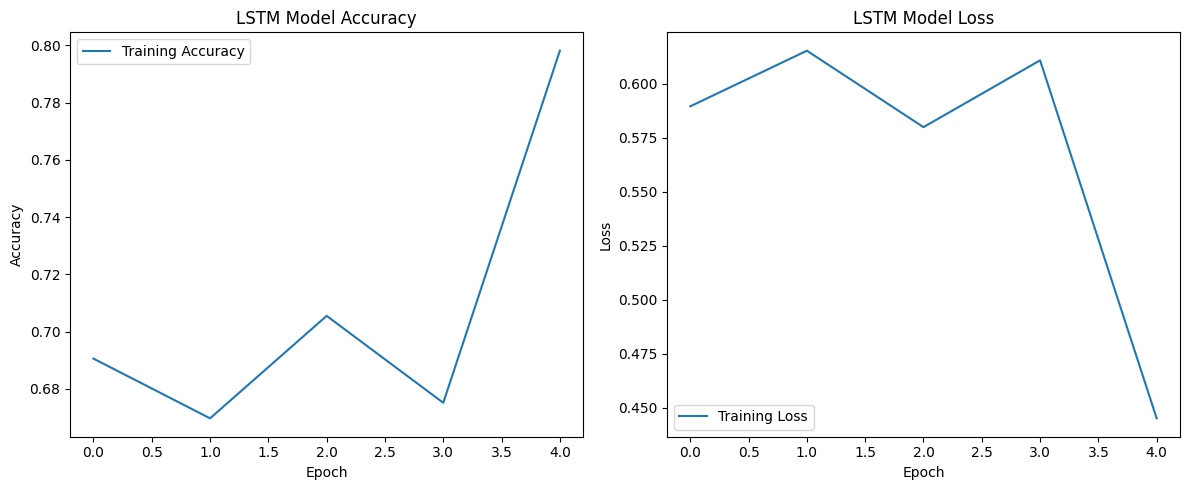

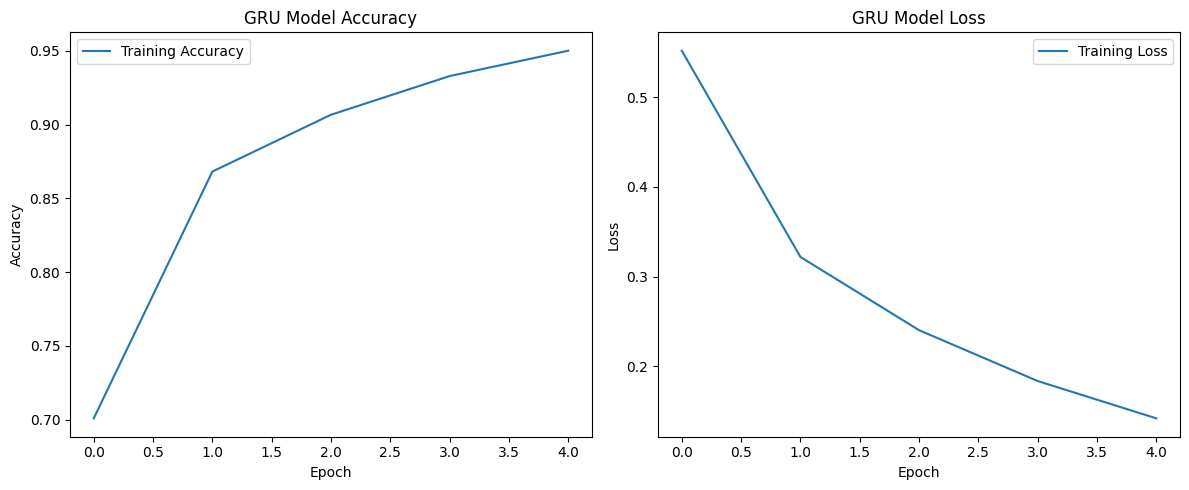

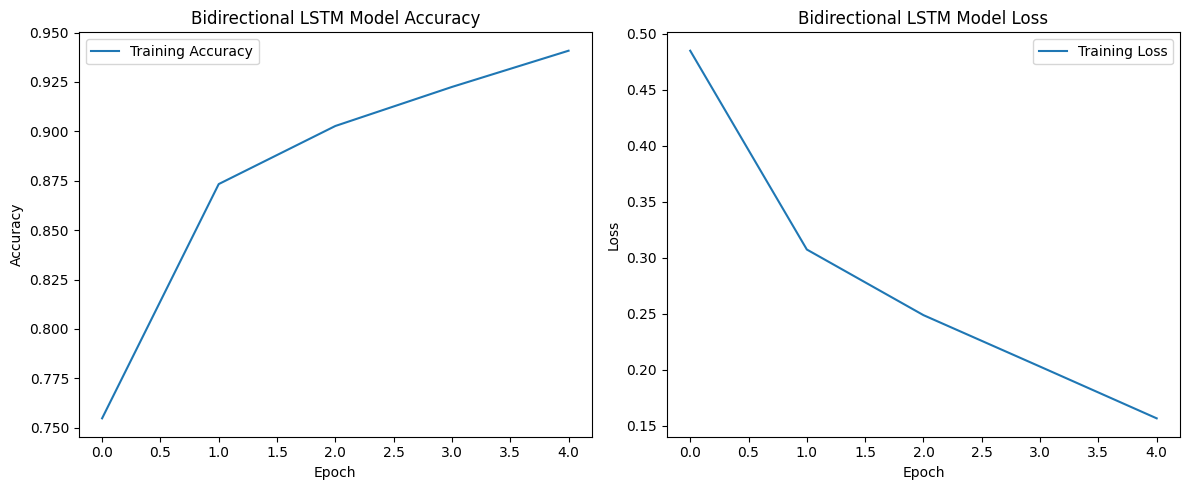

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in lstm_history.history:
    plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Training Loss')

if 'val_loss' in lstm_history.history:
    plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in gru_history.history:
    plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Training Loss')

if 'val_loss' in gru_history.history:
    plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bilstm_history.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in bilstm_history.history:
    plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bilstm_history.history['loss'], label='Training Loss')

if 'val_loss' in bilstm_history.history:
    plt.plot(bilstm_history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Reasoning**:
Generate and print classification reports and confusion matrices for each model's predictions on the test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
LSTM Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4961
           1       0.85      0.76      0.80      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Confusion Matrix:
[[4285  676]
 [1229 3810]]
--------------------------------------------------
GRU Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4961
           1       0.83      0.87      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
[[4058  903]
 [ 65

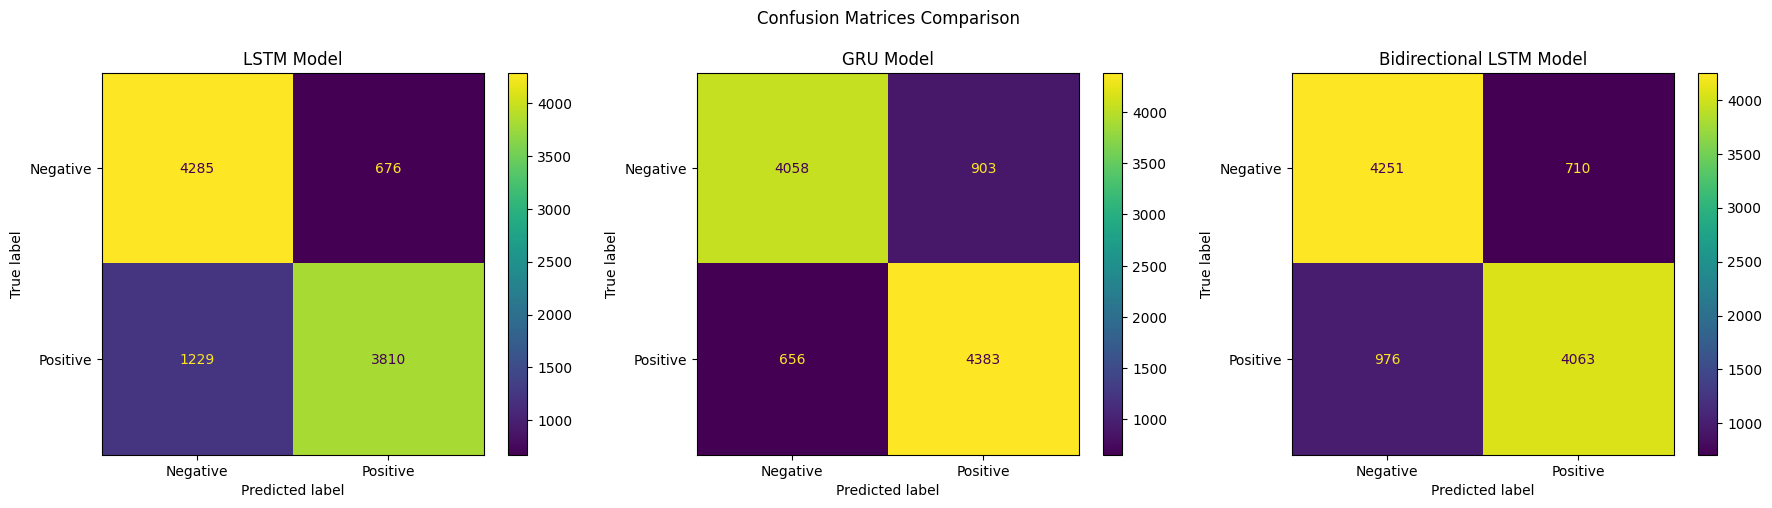

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


lstm_pred_prob = lstm_model.predict(X_test)
gru_pred_prob = gru_model.predict(X_test)
bilstm_pred_prob = bilstm_model.predict(X_test)


lstm_predictions = (lstm_pred_prob > 0.5).astype("int32")
gru_predictions = (gru_pred_prob > 0.5).astype("int32")
bilstm_predictions = (bilstm_pred_prob > 0.5).astype("int32")


print("LSTM Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, lstm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lstm_predictions))
print("-" * 50)


print("GRU Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, gru_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gru_predictions))
print("-" * 50)


print("Bidirectional LSTM Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, bilstm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, bilstm_predictions))
print("-" * 50)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison')

ConfusionMatrixDisplay.from_predictions(y_test, lstm_predictions, ax=axes[0], display_labels=['Negative', 'Positive'])
axes[0].set_title('LSTM Model')

ConfusionMatrixDisplay.from_predictions(y_test, gru_predictions, ax=axes[1], display_labels=['Negative', 'Positive'])
axes[1].set_title('GRU Model')

ConfusionMatrixDisplay.from_predictions(y_test, bilstm_predictions, ax=axes[2], display_labels=['Negative', 'Positive'])
axes[2].set_title('Bidirectional LSTM Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
Generate and plot the ROC curves for each model to visualize their performance across different thresholds.

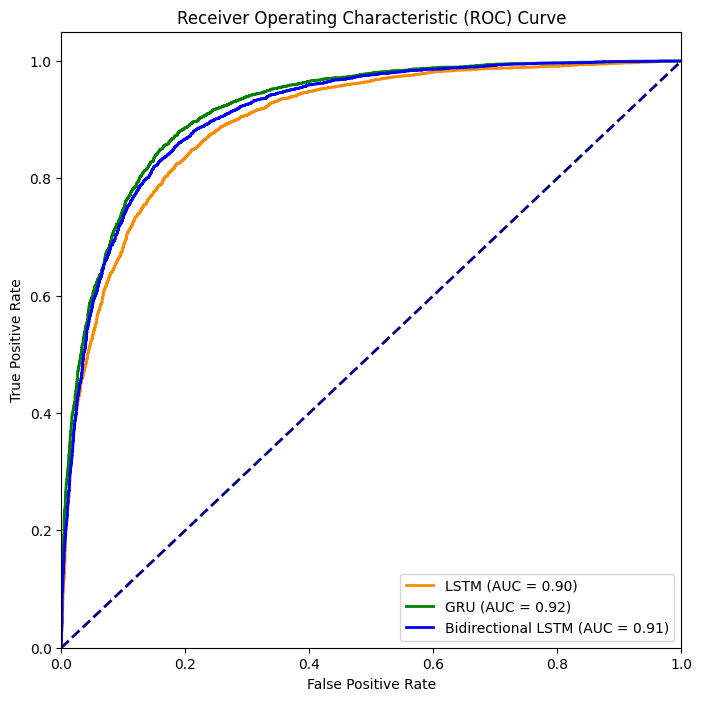

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, lstm_pred_prob)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)


fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_test, gru_pred_prob)
roc_auc_gru = auc(fpr_gru, tpr_gru)


fpr_bilstm, tpr_bilstm, thresholds_bilstm = roc_curve(y_test, bilstm_pred_prob)
roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)


plt.figure(figsize=(8, 8))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_gru, tpr_gru, color='green', lw=2, label=f'GRU (AUC = {roc_auc_gru:.2f})')
plt.plot(fpr_bilstm, tpr_bilstm, color='blue', lw=2, label=f'Bidirectional LSTM (AUC = {roc_auc_bilstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Select a few examples from the test set
num_examples = 5
example_indices = np.random.choice(len(X_test), num_examples, replace=False)

print("Example Predictions:")
print("-" * 50)

# Get the original indices from the split
test_indices = X_test.index if hasattr(X_test, 'index') else np.arange(len(X_test))


for i in example_indices:

    original_df_index = test_indices[i]
    review = df['review'].iloc[original_df_index]
    actual_sentiment = y_test[i]
    lstm_pred = lstm_predictions[i][0]
    gru_pred = gru_predictions[i][0]
    bilstm_pred = bilstm_predictions[i][0]

    print(f"Review: {review[:200]}...") # Prints only the first 200 characters
    print(f"Actual Sentiment: {'Positive' if actual_sentiment == 1 else 'Negative'}")
    print(f"LSTM Prediction: {'Positive' if lstm_pred == 1 else 'Negative'}")
    print(f"GRU Prediction: {'Positive' if gru_pred == 1 else 'Negative'}")
    print(f"Bidirectional LSTM Prediction: {'Positive' if bilstm_pred == 1 else 'Negative'}")
    print("-" * 50)

Example Predictions:
--------------------------------------------------
Review: This is probably one of the worst movies ever made. Bad acting, bad special effects, bad plot, bad everything. In the last 15 minutes a cat suited-cyborg is introduced which muddles everything. Malcom...
Actual Sentiment: Negative
LSTM Prediction: Negative
GRU Prediction: Negative
Bidirectional LSTM Prediction: Negative
--------------------------------------------------
Review: What a stupid idea. Ewoks should be enslaved and tortured. Utterly useless as a species... Fine you want ten lines of text regarding my unending hatred of Ewoks? Fine, here it is, fool. First of all, ...
Actual Sentiment: Negative
LSTM Prediction: Negative
GRU Prediction: Negative
Bidirectional LSTM Prediction: Negative
--------------------------------------------------
Review: The book "The Railway Children" is a children's book published in 1906 by Edith Nesbit, an early British socialist who had very strong views about the importa